# Генерация дополнительных данных (не используется)

Т.к. в датасете менне 100 записей, это может отрицательно сказаться на обучении алгоритмов

1.Дополним датасет до 1000 записей
2.Сохраним датасет в файл ds_oversampled.xlsx


In [7]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SVMSMOTE, SMOTE
from sklearn.multioutput import MultiOutputRegressor
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_excel("../Data/ds_merged.xlsx")
df = df.drop(['Unnamed: 0'], axis =1)
df

,IW,IF,VW,FP,Depth,Width,Y1,Y2
0,0.666667,0.421053,0.0,0.400000,0.833333,0.934783,8,12
1,0.666667,0.421053,0.0,0.400000,0.854167,0.891304,8,12
2,0.666667,0.421053,0.0,0.400000,0.916667,1.000000,8,13
3,0.666667,0.421053,0.0,0.400000,0.812500,0.913043,7,12
4,0.333333,0.473684,0.0,0.400000,1.000000,0.869565,8,12
...,...,...,...,...,...,...,...,...
67,0.166667,0.789474,0.6,0.133333,0.416667,0.043478,6,8
68,0.333333,0.789474,0.6,0.133333,0.583333,0.086957,6,8
69,0.333333,0.789474,0.6,0.133333,0.500000,0.086957,6,8
70,0.333333,0.789474,0.6,0.133333,0.500000,0.086957,6,8


array([[<AxesSubplot:title={'center':'IW'}>,
        <AxesSubplot:title={'center':'IF'}>,
        <AxesSubplot:title={'center':'VW'}>],
       [<AxesSubplot:title={'center':'FP'}>,
        <AxesSubplot:title={'center':'Depth'}>,
        <AxesSubplot:title={'center':'Width'}>],
       [<AxesSubplot:title={'center':'Y1'}>,
        <AxesSubplot:title={'center':'Y2'}>, <AxesSubplot:>]],
      dtype=object)

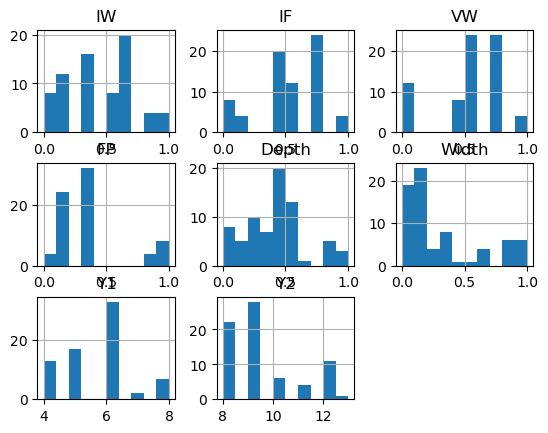

In [4]:
df.hist()

In [71]:
from sdv.tabular import GaussianCopula
model = GaussianCopula(field_types = {0: "float", 1: "float",2: "float",3: "float",4: "float",5: "float"})
df1 =  df.iloc[:,:6]
model.fit(df1)

In [74]:
from sdv.tabular import TVAE
model = TVAE() 
model.fit(df.iloc[:,:6])

C:\Users\Space\anaconda3\envs\tf\lib\site-packages\ctgan\data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
C:\Users\Space\anaconda3\envs\tf\lib\site-packages\ctgan\data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
C:\Users\Space\anaconda3\envs\tf\lib\site-packages\ctgan\data_transformer.py:112: SettingWithCopyWarning: 
A value is trying to be set on 

In [75]:
new_data = model.sample(num_rows=100)

In [79]:
df1

,IW,IF,VW,FP,Depth,Width
0,0.666667,0.421053,0.0,0.400000,0.833333,0.934783
1,0.666667,0.421053,0.0,0.400000,0.854167,0.891304
2,0.666667,0.421053,0.0,0.400000,0.916667,1.000000
3,0.666667,0.421053,0.0,0.400000,0.812500,0.913043
4,0.333333,0.473684,0.0,0.400000,1.000000,0.869565
...,...,...,...,...,...,...
67,0.166667,0.789474,0.6,0.133333,0.416667,0.043478
68,0.333333,0.789474,0.6,0.133333,0.583333,0.086957
69,0.333333,0.789474,0.6,0.133333,0.500000,0.086957
70,0.333333,0.789474,0.6,0.133333,0.500000,0.086957


In [81]:
new_data

,IW,IF,VW,FP,Depth,Width
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
95,1.0,1.0,1.0,0.0,1.0,0.0
96,0.0,1.0,1.0,0.0,0.0,0.0
97,1.0,0.0,1.0,1.0,0.0,0.0
98,0.0,1.0,1.0,0.0,1.0,0.0


In [27]:
#sm = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=0)

X=df.iloc[:,:6]
#y=np.ones(df.shape[0])
#y[:10]=0

#np.random.shuffle(y)
y=df.iloc[:,7]

In [28]:

X_res, y_res = sm.fit_resample(X, y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [21]:
X_res.shape


(124, 6)

In [22]:
X.shape

(72, 6)

In [ ]:
df.to_excel("../Data/ds_oversampled.xlsx")